# Продажи компьютерных игр

Из открытых источников доступны исторические данные (до 2016 г.) о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит спланировать рекламные кампании для интернет-магазина по продаже игр.

Данные предоставлены в файле games.csv. Из документации по каждой компьютерной игре в данных можно найти название, жанр, год выпуска, платформу, информацию по продажам в разных частях света, возрастной рейтинг и оценки от пользователей и экспертов. Данные за 2016 год могут быть неполными.

**Цель исследования** — установить параметры, влияющие на успешность (продаваемость) игр. Это позволит спланировать рекламную кампанию на 2017 год. А также проверить гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

**Оглавление проекта**
1. [Изучение данных из файла](#start)
    * 1.1. [Вывод по файлу](#conclusion_1)
2. [Предобработка данных](#preprocessing)
    * 2.1. [Обработка пропущенных значений](#preprocessing_1)
    * 2.2. [Замена типа данных](#preprocessing_2)
    * 2.3. [Добавление рассчетных данных](#preprocessing_3)
3. [Исследовательский анализ данных](#analysis)
    * 3.1. [Вывод по анализу](#conclusion_3)
4. [Портрет пользователей по регионам](#portrait)
    * 4.1. [Вывод по региональным портретам](#conclusion_4)
5. [Проверка гипотез](#hypotheses)
6. [Общий вывод по исследованию](#conclusion)

## Изучение данных из файла
<a id="start"></a>

In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

Получение общей информации о данных и первых 10 строк таблицы:

In [2]:
# загрузка данных с возможностью открывать файл локально
path = 'C:/Data/'
data = pd.read_csv(path + 'games.csv')
data.info(memory_usage='deep')
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 5.6 MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Получение случайных 10 значений из выборки:

In [3]:
data.sample(n=10, random_state=1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.00,0.00,59.0,5.8,T
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T


Вывод описательной статистики по столбцам в транспонированном виде:

In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446,NaN,NaN,NaN,2006.48,5.87705,1980,2003,2007,2010,2016
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715,NaN,NaN,NaN,0.263377,0.813604,0,0,0.08,0.24,41.36
EU_sales,16715,NaN,NaN,NaN,0.14506,0.503339,0,0,0.02,0.11,28.96
JP_sales,16715,NaN,NaN,NaN,0.0776171,0.308853,0,0,0,0.04,10.22
Other_sales,16715,NaN,NaN,NaN,0.0473419,0.186731,0,0,0.01,0.03,10.57
Critic_Score,8137,NaN,NaN,NaN,68.9677,13.9382,13,60,71,79,98
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод по файлу
<a id="conclusion_1"></a>
В таблице всего 11 столбцов.

Следующие столбцы имеют тип данных object:
* `Name` — название игры;
* `Platform` — платформа;
* `Genre` — жанр игры;
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — возрастной рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

Следующие столбцы имеют тип данных float64:
* `Year_of_Release` — год выпуска игры;
* `NA_sales` — продажи в Северной Америке (млн. проданных копий);  
* `EU_sales` — продажи в Европе (млн. проданных копий);
* `JP_sales` — продажи в Японии (млн. проданных копий);
* `Other_sales` — продажи в других странах (млн. проданных копий);
* `Critic_Score` — оценка критиков (максимум 100).

В данных многих столбцов есть пропущенные значения. Необходимо проанализировать их и заполнить пропуски там, где это уместно. У нас пропуски в таблице есть полностью случайные (большинство) и случайные (например, в колонке Рейтинг от ESRB, который используется для американского рынка и естественно его не будет у игр ориентированных на Японию). Непонятна природа получения этих данных (кажется, что они собирались из нескольких источников), кто их заполнял, чтобы предположить, например, что оценки критиков и пользователей были незаполнены неслучайно (с целью, чтобы на них никто не посмотрел). Возможно, часть данных с оценками просто потерялась из-за чьей-то ошибки (потому что достаточно много игр с отличными продажами, но вообще без оценок и рейтинга, и нет такого что отсутствуют оценки пользователей/критиков только для определенных платформ).

Есть столбцы, где тип данных следует изменить: `User_Score` на float64, `Year_of_Release` на datetime, `Genre` и `Rating` на category. Названия столбцов лучше привести к нижнему регистру. Обязательно проверим таблицу на дубликаты, в том числе на неявные дубликаты колонки `Name`, `Platform` и `Genre`. Возрастные категории в колонке `Rating` опишем на основе данных с сайта https://www.esrb.org/, так как в столбце указаны только аббревиатуры.

Чтобы корректно провести анализ факторов, влияющих на успешность игр, нужно в первую очередь устранить проблемы в данных. Также для исследования может понадобиться информация по суммарным продажам для каждой игры.

## Предобработка данных
<a id="preprocessing"></a>

Переименование столбцов:

In [5]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверка на дубликаты:

In [6]:
print('Найдено явных дубликатов:', data.duplicated().sum())
display(data['platform'].str.lower().unique(), len(data['platform'].str.lower().unique()))
display(data['genre'].str.lower().unique(), len(data['genre'].str.lower().unique()))
data['name'].str.lower().value_counts().head(10)

Найдено явных дубликатов: 0


array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

31

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

13

need for speed: most wanted                12
fifa 14                                     9
ratatouille                                 9
madden nfl 07                               9
lego marvel super heroes                    9
lego batman 3: beyond gotham                8
fifa 15                                     8
angry birds star wars                       8
lego star wars ii: the original trilogy     8
lego the hobbit                             8
Name: name, dtype: int64

В столбцах **platform** и **genre** неявных дубликатов нет. А вот столбец **name** лучше изучить подробнее:

In [7]:
display(data.query('name == "Need for Speed: Most Wanted"'))
data.query('name == "Ratatouille"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


На основе вывода информации по двум часто встречающимся играм в данных следует, что одни и те же игры выходили для разных платформ, а также бывают игры для одной платформы, но с разным годом релиза.

Обогащение данных столбца **rating**:

In [8]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [9]:
# с сайта ассоциации ESRB и википедии берем значения для каждой категории и меняем в таблице:
data['rating'] = data['rating'].replace('E', 'Everyone')
data['rating'] = data['rating'].replace('M', 'Mature 17+')
data['rating'] = data['rating'].replace('T', 'Teen') # от 13 лет
data['rating'] = data['rating'].replace('E10+', 'Everyone 10+')
data['rating'] = data['rating'].replace('K-A', 'Kids to Adults') # использовался до 1998 г. и затем переименован в E
data['rating'] = data['rating'].replace('AO', 'Adults Only 18+') 
data['rating'] = data['rating'].replace('EC', 'Early Childhood') # От 3 лет, с 2018 г. относится к E
data['rating'] = data['rating'].replace('RP', 'Rating Pending') # рейтинг ожидается
data['rating'].unique()

array(['Everyone', nan, 'Mature 17+', 'Teen', 'Everyone 10+',
       'Kids to Adults', 'Adults Only 18+', 'Early Childhood',
       'Rating Pending'], dtype=object)

### Обработка пропущенных значений
<a id="preprocessing_1"></a>

In [10]:
# смотрим что за строки с пропущенным значением genre
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце **genre** всего 2 пропуска, совпадающих с пропусками в столбце **name**. Жанр игры важный параметр для исследования. Считаю, что эти строки можно удалить, на выборку это не повлияет.

In [11]:
data = data.dropna(subset=['genre'])
# подсчет оставшихся пропусков
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [12]:
# смотрим что за строки с пропущенным значением year_of_release
data.loc[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,Everyone
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,Everyone
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,Everyone 10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [13]:
data.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,Everyone
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,Everyone
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,Everyone
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,Everyone


Пропуски года релиза можно заполнить на основе значений в этой колонке по этой игре на других платформах, как правило релизы выходят на всех платформах в один год.

In [14]:
# для удобства будем брать максимальный год
for game_name in data['name'].unique():
    max_year_of_release = data.loc[data['name'] == game_name, 'year_of_release'].max()
    data.loc[(data['year_of_release'].isna()) & (data['name'] == game_name), 'year_of_release'] = max_year_of_release
data.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

По оставшимся 146 пустым значениям вряд ли получится заполнить чем-то разумным значение года релиза, если только в интернете искать по каждой игре, но это займет слишком много времени. Пропуски в столбцах **critic_score** и **user_score** не заполняем, так как заполнять даже на основе рейтинга на других платформах при наличии было бы некорректно (это очень субъективные данные), не говоря уже о медианных значениях по жанру, заполнение может исказить результаты кореляционного анализа. В колонке **rating** отсутствующие значения разумно заполнить заглушкой "Unknown".

In [15]:
data['rating'] = data['rating'].fillna('Unknown')

В столбце **user_score** присутствует 2424 значения "tbd", что означает "подлежит определению" или "будет определено". Заполним это значение NaN, т.е. отсутствием данных, чтобы потом перевести значения столбца в подходящий тип данных.

In [16]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

### Замена типа данных
<a id="preprocessing_2"></a>

In [17]:
data['user_score'] = data['user_score'].astype('float')
data['genre'] = data['genre'].astype('category')
data['rating'] = data['rating'].astype('category')
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null datetime64[ns]
genre              16713 non-null category
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null category
dtypes: category(2), datetime64[ns](1), float64(6), object(2)
memory usage: 3.3 MB


### Добавление рассчетных данных
<a id="preprocessing_3"></a>

In [18]:
# добавим суммарные продажи во всех регионах в отдельный столбец
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных
<a id="analysis"></a>

Смотрим, сколько игр выпускалось в разные годы:

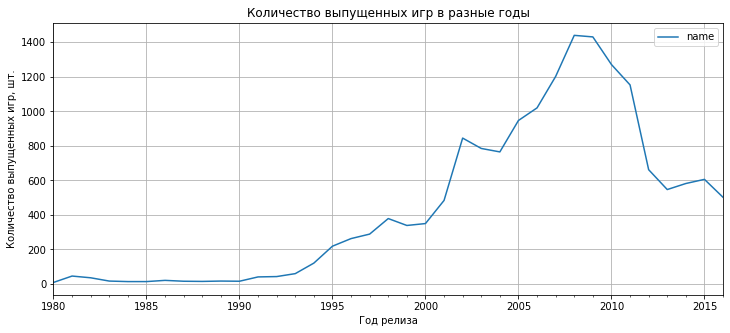

In [19]:
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(grid=True, figsize=(12, 5))
)
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр, шт.')
plt.title('Количество выпущенных игр в разные годы');

Видно, что до 1990 года количество игр близко к 0, можно отсеить эти игры, так как платформ тогда было очень мало и игры были примитивные. После 2009 года наблюдается спад в индустрии. Прежде всего это может быть связано с развитием смартфонов и переходом части аудитории на мобильный гейминг. Во-вторых, перестали выпускать что-то бомбическое, не хватает новых идей и чего-то революционного в этой отрасли.

Смотрим, какие были продажи по платформам:

In [20]:
data.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values('world_sales', ascending = False)

,world_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


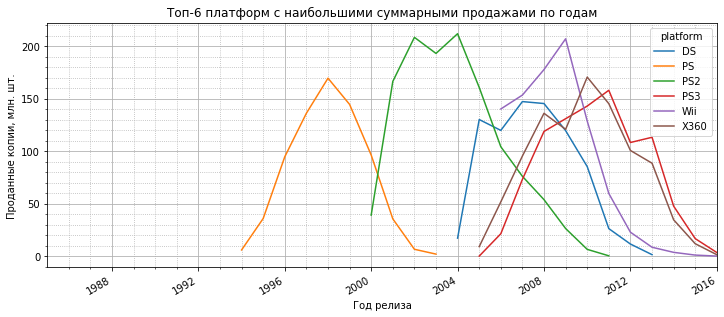

In [21]:
# в предыдущей таблице выделяются 6 платформ по наибольшим продажам, смотрим по ним график продаж по годам
(
    data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")')
    .pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
    .plot(grid=True, figsize=(12, 5))
)
plt.xlabel('Год релиза')
plt.ylabel('Проданные копии, млн. шт.')
plt.title('Топ-6 платформ с наибольшими суммарными продажами по годам')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');

In [22]:
# теперь понятно почему график начинается с 1985 года, есть ошибочное значение по платформе DS, избавлюсь от него
data = data[~((data['platform'] == 'DS') & (data['year_of_release'] < '2004-01-01'))]
# подсчет средней продолжительности существования платформы
platform_max_year = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")').pivot_table(index='platform', values='year_of_release', aggfunc='max')
platform_min_year = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")').pivot_table(index='platform', values='year_of_release', aggfunc='min')
diff_platform_year = platform_max_year['year_of_release'].dt.year - platform_min_year['year_of_release'].dt.year
diff_platform_year.mean().round(2)

10.17

Можно выделить характерный срок за который появляются новые и исчезают старые платформы. Это 10 лет. Игровая индустрия достаточно быстро меняется, данные за предыдущие годы учитывать не стоит. Если в расчет характерного срока включить все платформы, то мы получим выбросы. Некоторые платформы появились только в 2013 году, а некоторые живут с 1985 года - это PC. Есть и старые платформы, которые жили пару десятилетий (как "2600") до бурного развития индустрии.

In [23]:
# оставляем игры с релизом не раньше 2007 года
data = data.query('year_of_release >= 2007')

Посмотрим такой же график но уже по всем платформам с 2007 года:

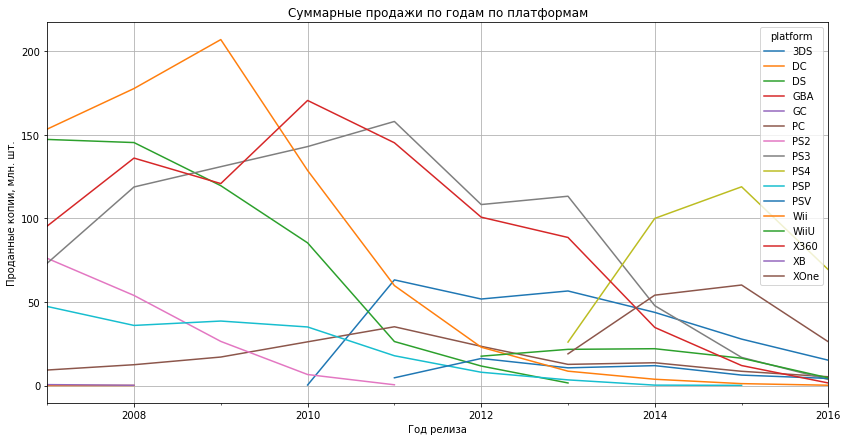

In [24]:
(
    data.pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
    .plot(grid=True, figsize=(14, 7))
)
plt.xlabel('Год релиза')
plt.ylabel('Проданные копии, млн. шт.')
plt.title('Суммарные продажи по годам по платформам');

Учитывая, что данные за 2016 год у нас неполные, вполне вероятно, что падение продаж в 2016 году на графике по платформам PS4 и XOne таковым не является, у них есть перспективы лидировать по продажам игр в ближайшие годы, так как они появились сравнительно недавно. Тройку лидеров по 2016 году замыкает платформа 3DS, но перспектив для роста у нее не видно. Остальные платформы существуют на рынке достаточно давно и либо скоро исчезнут, либо продажи по ним незначительны. Можно заметить на примере PlayStation, что обновленная платформа выходит через 5-8 лет. Будем считать, что **актуальный период** данных для нашего исследования начинается с 2013 года, когда вышли последние платформы линеек PlayStation и Xbox, данные за предыдущие годы учитывать не будем.

In [25]:
# оставляем игры с релизом не раньше 2013 года
data = data.query('year_of_release >= 2013')

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

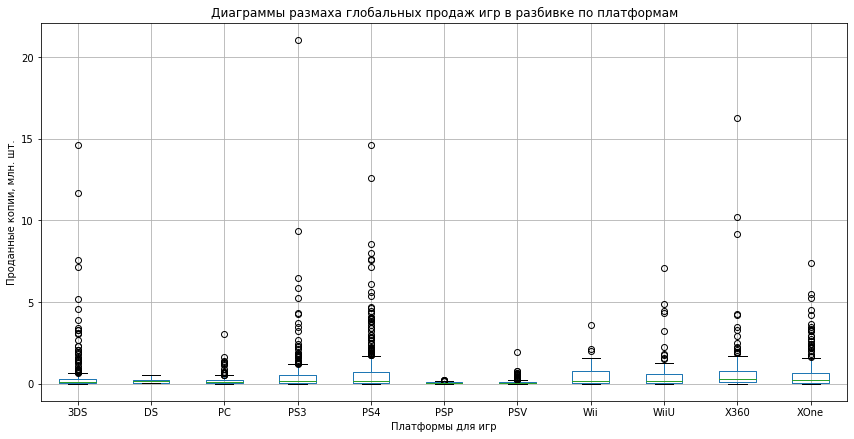

In [26]:
data.boxplot(column = 'world_sales', by = 'platform', figsize=(14, 7))
plt.xlabel('Платформы для игр')
plt.ylabel('Проданные копии, млн. шт.')
plt.suptitle('')
plt.title('Диаграммы размаха глобальных продаж игр в разбивке по платформам');

Из-за большого количества выбивающихся значений (успешных по продажам игр) графики сложно анализировать, но в целом заметно, что интервал до 2 млн. копий был бы нагляднее.

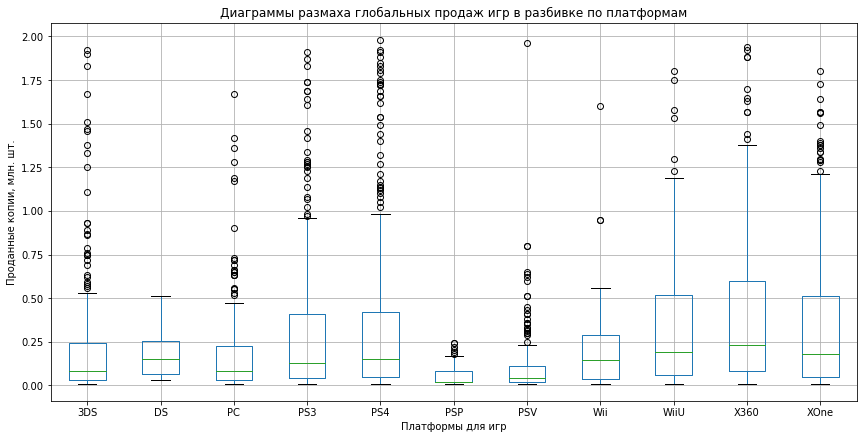

In [27]:
(
    data.query('world_sales <= 2.0')
    .boxplot(column = 'world_sales', by = 'platform', figsize=(14, 7))
)
plt.xlabel('Платформы для игр')
plt.ylabel('Проданные копии, млн. шт.')
plt.suptitle('')
plt.title('Диаграммы размаха глобальных продаж игр в разбивке по платформам');

По графикам можно сказать, что медианные значения продаж игр по платформам не превышают 250 тыс. копий по игре. В лидерах по медианному значению продаж платформа X360. Для нее граница нормальных значений продаж за игру не превышает 1.5 млн. копий, у платформ от PlayStation (PS3 и PS4) эта граница находится в диапазоне 1 млн. копий, но видно насколько больше выбивающихся значений продаж игр именно у PlayStation. Еще можно отметить хорошие значения средних продаж у платформ WiiU и XOne - граница находится у 1.25 млн. копий.

In [28]:
# дополнительно смотрим сколько игр по платформам
display(data['platform'].value_counts())

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      192
X360    186
WiiU    115
PSP      68
Wii      23
DS        8
Name: platform, dtype: int64

Медианные значения продаж игр по платформам определяют среднее значение продаж в наборе данных с выбивающимися значениями. То есть там, где медианные значения больше у платформ, средняя продажа копий игры выше. В приципе везде, где датасеты скошены сильно вверх от медианного значения, то там или большой разброс значений в сторону Q3 и до верхнего уса или есть приличная доля игр-бестселлеров, для нашего исследования многочисленные выбивающиеся значения - это хорошо, эти платформы должны показывать хорошие продажи игр.

In [29]:
# посмотрим лидеров выбивающихся значений по платформам (берем порог в 1.50 млн. копий)
(
    data.query('world_sales > 1.50')
    .pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values('world_sales', ascending = False)
)

,world_sales
platform,
PS4,225.52
PS3,94.56
3DS,91.15
XOne,88.51
X360,78.67
WiiU,32.82
Wii,9.34
PC,4.72
PSV,1.96


Посмотрим, как влияют на продажи внутри одной популярной платформы (X360) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами:

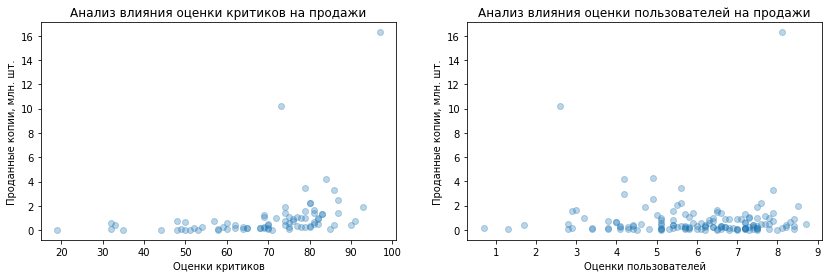

Коэффициент Пирсона корреляции между продажей игр для X360 и оценками критиков: 0.3503445460228666
Коэффициент Пирсона корреляции между продажей игр для X360 и оценками пользователей: -0.011742185147181387


In [30]:
data_x360 = data.query('platform == "X360"')

# использую диаграммы рассеяния для анализа зависимостей продаж игр для X360 от оценок пользователей и критикиов
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(14, 4)
)
ax1.scatter(x=data_x360['critic_score'], y=data_x360['world_sales'], alpha=0.3)
ax1.set_title('Анализ влияния оценки критиков на продажи')
ax1.set_xlabel('Оценки критиков')
ax1.set_ylabel('Проданные копии, млн. шт.')
ax2.scatter(x=data_x360['user_score'], y=data_x360['world_sales'], alpha=0.3)
ax2.set_title('Анализ влияния оценки пользователей на продажи')
ax2.set_xlabel('Оценки пользователей')
ax2.set_ylabel('Проданные копии, млн. шт.')
plt.show()

print("Коэффициент Пирсона корреляции между продажей игр для X360 и оценками критиков:",
               data_x360['critic_score'].corr(data_x360['world_sales']))
print("Коэффициент Пирсона корреляции между продажей игр для X360 и оценками пользователей:",
               data_x360['user_score'].corr(data_x360['world_sales']))

Можно сделать вывод, что нет зависимости между количеством продаж игр для платформы X360 и оценками от пользователей, и наблюдается тенденция к увеличению продаж игр при высоких оценках критиков, но явной корреляции тоже нет. Посмотрим, как обстоит дело с такими же зависимостями по другим популярным платформам:

In [31]:
top_5 = data.groupby('platform').agg({'world_sales':'sum'}).sort_values('world_sales', ascending = False).head().index

print('Корреляция между количеством продаж игр и оценкой пользователей по первым 5 платформам:')
for platform in top_5:
    display(platform, [data.query('platform == @platform')[['world_sales', 'user_score']].corr()])
print('')    
print('Корреляция между количеством продаж игр и оценкой критиков по первым 5 платформам:')
for platform in top_5:
    display(platform, [data.query('platform == @platform')[['world_sales', 'critic_score']].corr()])        

Корреляция между количеством продаж игр и оценкой пользователей по первым 5 платформам:


'PS4'

[             world_sales  user_score
 world_sales     1.000000   -0.031957
 user_score     -0.031957    1.000000]

'PS3'

[             world_sales  user_score
 world_sales     1.000000    0.002394
 user_score      0.002394    1.000000]

'XOne'

[             world_sales  user_score
 world_sales     1.000000   -0.068925
 user_score     -0.068925    1.000000]

'3DS'

[             world_sales  user_score
 world_sales     1.000000    0.241504
 user_score      0.241504    1.000000]

'X360'

[             world_sales  user_score
 world_sales     1.000000   -0.011742
 user_score     -0.011742    1.000000]


Корреляция между количеством продаж игр и оценкой критиков по первым 5 платформам:


'PS4'

[              world_sales  critic_score
 world_sales      1.000000      0.406568
 critic_score     0.406568      1.000000]

'PS3'

[              world_sales  critic_score
 world_sales      1.000000      0.334285
 critic_score     0.334285      1.000000]

'XOne'

[              world_sales  critic_score
 world_sales      1.000000      0.416998
 critic_score     0.416998      1.000000]

'3DS'

[              world_sales  critic_score
 world_sales      1.000000      0.357057
 critic_score     0.357057      1.000000]

'X360'

[              world_sales  critic_score
 world_sales      1.000000      0.350345
 critic_score     0.350345      1.000000]

Кажется, что никакой корреляции по отзывам пользователей с продажами не наблюдается, кроме тенденции к корреляции у 3DS. А вот по хорошим отзывам критиков можно сказать, что тенденция к повышению продаж есть у всех популярных платформ. Графики решил не выводить, так как на них ничего нового мы не увидим, будет плюс-минус как у X360.

Полагаю, что оценка от критиков выходит раньше, чем от пользователей. И некоторые геймеры действительно ориентируются на оценку рецензии на игру и после этого покупают ее. То есть игра вышла, есть какая-то оценка критиков хорошая, продажи по игре растут, потом оказывается, что пользователям она не особо понравилась, но продажи состоялись.

Посмотрим на общее распределение игр по жанрам. Выделим хорошо продаваемые и не очень продаваемые жанры, а также определим, что на это может влиять:

In [32]:
# разбивка количества игр по жанрам
data['genre'].value_counts()

Action          769
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            156
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

In [33]:
# продажа игр по жанрам в регионах и суммарно
data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'world_sales'],
                 aggfunc='sum').sort_values('world_sales', ascending = False)

,eu_sales,jp_sales,na_sales,other_sales,world_sales
genre,,,,,
Action,118.61,40.49,126.13,37.27,322.50
Shooter,87.86,6.61,109.74,28.77,232.98
Sports,60.52,5.41,65.27,19.45,150.65
Role-Playing,36.97,51.04,46.40,11.48,145.89
Misc,20.04,9.44,27.49,6.09,63.06
Platform,15.58,4.79,18.14,4.12,42.63
Racing,20.19,2.30,12.96,4.44,39.89
Fighting,8.55,7.65,15.55,3.56,35.31
Adventure,8.25,5.82,7.14,2.43,23.64


Видно, что наибольшие продажи почти по всем популярным жанрам в Северной Америке, следом идут продажи в Европе. Но есть и интересное исключение, в Японии крайне популярен жанр Role-Playing, может с этим связано, что японцы так любят переодеваться в героев анимэ и игр. 

Из общих наблюдений: жанр Action самый многочисленный и продается больше всех, на втором месте по продажам жанр Shooter хотя по количеству игр он только 5-ый, жанр Sport золотая середина (многочисленный и хорошо продается), вызывает удивление жанр Adventure - он 3-ий по количеству игр, но продажи по нему в хвосте списка. Объемы продаж Strategy и Puzzle самые маленькие и таких игр действительно меньше.

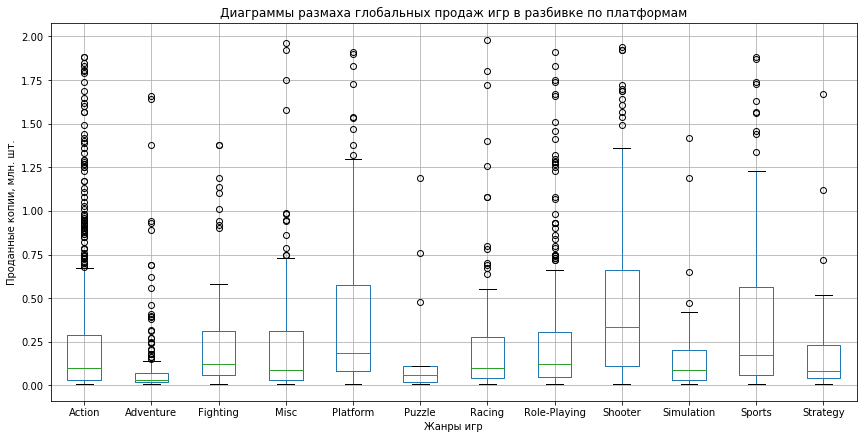

In [34]:
# смотрим пороговые значения по жанрам
(
    data.query('world_sales <= 2.0')
    .boxplot(column = 'world_sales', by = 'genre', figsize=(14, 7))
)
plt.xlabel('Жанры игр')
plt.ylabel('Проданные копии, млн. шт.')
plt.suptitle('')
plt.title('Диаграммы размаха глобальных продаж игр в разбивке по платформам');

In [35]:
# посмотрим влияние на продажи по жанрам с учетом выбивающихся значений (берем порог в 1.50 млн. копий)
(
    data.query('world_sales > 1.50')
    .pivot_table(index='genre', values='world_sales', aggfunc='sum').sort_values('world_sales', ascending = False)
)

,world_sales
genre,
Shooter,178.25
Action,166.69
Sports,91.33
Role-Playing,80.30
Misc,34.33
Racing,22.51
Platform,22.35
Fighting,15.20
Simulation,11.32


Действительно в жанре Shooter присутствует больший % игр, которые стали бестселлерами, у него же самое высокое медианное значение. В жанре Adventure медианное значение продаж самое маленькое.

### Вывод по анализу
<a id="conclusion_3"></a>
1. Выделили характерный срок жизни платформы, за который появляется и исчезают игровая платформа - около 10 лет. При этом если сравнивать платформы одной линейки (например, PS2, PS3, PS4), то обновленная платформа PS3 вышла через 5 лет после PS2, а PS4 через 8 лет после PS3, то есть какое-то время они сосуществуют.
2. Актуальный период данных для нашего исследования определили с 2013 года, это срок выхода последних платформ от Xbox и PlayStation.
3. У платформ PS4 и XOne есть перспективы лидировать в 2017 году по продажам игр, так как они появились сравнительно недавно. Тройку лидеров продаж в 2016 году замыкает платформа 3DS, но ее срок жизни подходит к концу.
4. Можно сказать, что медианные средние значения продаж игр по платформам не превышают 250 тыс. копий по игре. В лидерах по медианному значению продаж платформа X360. Для популярных платформ граница нормальных значений продаж за игру не превышает 1.5 млн. копий.
5. Никакой корреляции по отзывам пользователей с продажами не наблюдается. А вот по хорошим отзывам критиков можно сказать, что тенденция к повышению продаж есть у всех самых популярных платформ (TОП-5 по продажам с 2013 года: 1) PS4 2) PS3 3) XOne 4) 3DS 5) X360).
6. Количество проданных копий игр по определенному жанру безусловно зависит от всего количества выпущенных игр данного жанра. В лидерах по продажам в мире жанры: Action, Shooter, Sports. Лучшие продажи по этим жанрам в Северной Америке. Но есть и интересные факты - 1) в Японии крайне популярен жанр Role-Playing (и его продажи больше чем в других регионах) 2) в жанре Shooter присутствует больший % игр, которые стали бестселлерами (с выбивающимися значениями продаж) 3) в жанре Adventure выпускается много игр, но продажи по нему низкие, в том числе из-за малого количества бестселлеров.

## Портрет пользователей по регионам
<a id="portrait"></a>
Определим для пользователей регионов (NA, EU, JP):
*	Самые популярные платформы (топ-5)
*	Самые популярные жанры (топ-5)
*	Влияние рейтинга ESRB на продажи

In [36]:
# автоматизирую вывод по первым двум вопросам через вложенный цикл по словарю

regions_dict = {'NA':'na_sales', 'EU':'eu_sales', 'JP':'jp_sales'}
for i,j in regions_dict.items():
    print(f"Самые популярные платформы (топ-5) для региона {i}:")
    display(data.groupby('platform').agg({j:'sum'}).sort_values(j, ascending = False).head())
    print('')
    print(f"Самые популярные жанры (топ-5) для региона {i}:")
    display(data.groupby('genre').agg({j:'sum'}).sort_values(j, ascending = False).head())
    print('')

Самые популярные платформы (топ-5) для региона NA:


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20



Самые популярные жанры (топ-5) для региона NA:


,na_sales
genre,
Action,126.13
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49



Самые популярные платформы (топ-5) для региона EU:


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96



Самые популярные жанры (топ-5) для региона EU:


,eu_sales
genre,
Action,118.61
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19



Самые популярные платформы (топ-5) для региона JP:


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88



Самые популярные жанры (топ-5) для региона JP:


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.44
Fighting,7.65
Shooter,6.61


Строим пай чарт для анализа влияния рейтинга ESRB на продажи по регионам:

Пай чарт долей продаж по рейтингу ESRB для региона NA:


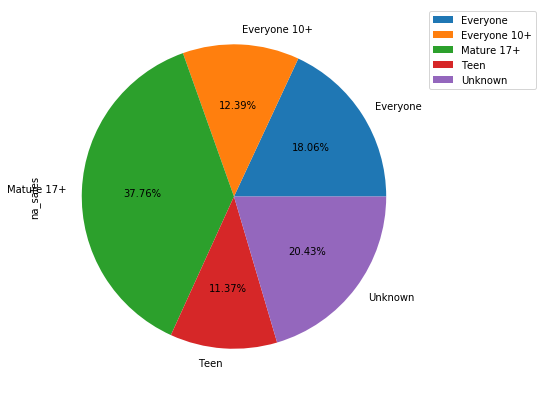


Пай чарт долей продаж по рейтингу ESRB для региона EU:


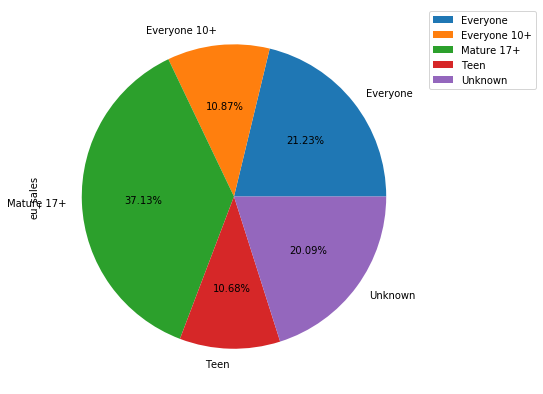


Пай чарт долей продаж по рейтингу ESRB для региона JP:


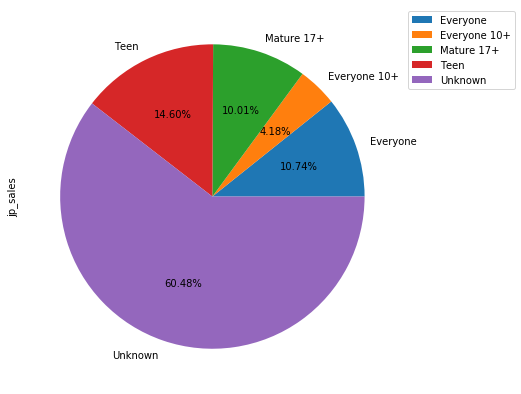

In [37]:
for i,j in regions_dict.items():
    print(f"Пай чарт долей продаж по рейтингу ESRB для региона {i}:")
    data.groupby(['rating']).sum()[j].loc[lambda x: x > 0].plot(kind='pie', y=j, figsize=(7, 7), autopct='%1.2f%%')
    #data.groupby('rating').agg({j:'sum'})[j].loc[lambda x: x > 0].plot(kind='pie', y=j, figsize=(7, 7), autopct='%1.1f%%')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
    print('')

Продажи по рейтингу ESRB для региона NA:


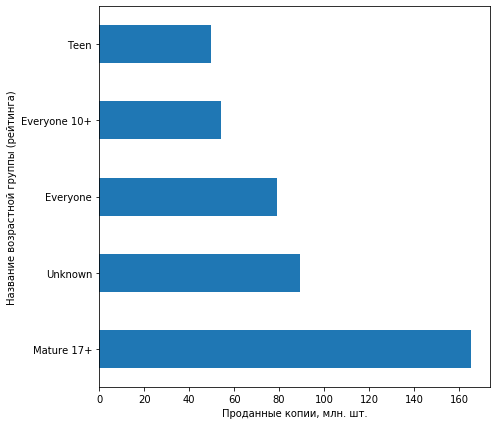


Продажи по рейтингу ESRB для региона EU:


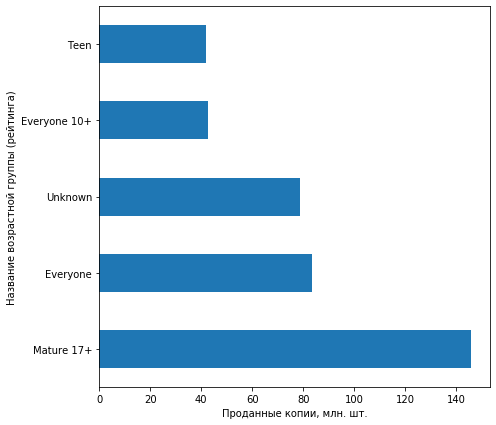


Продажи по рейтингу ESRB для региона JP:


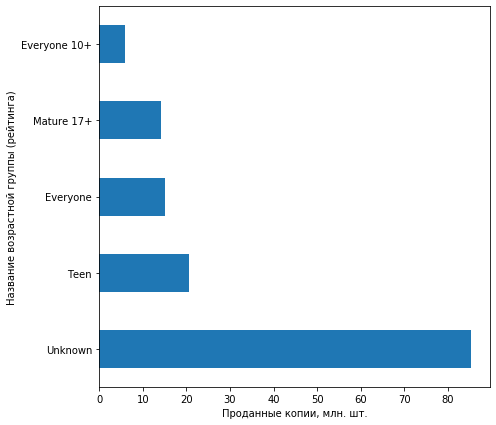

In [38]:
# представление в столбчатых диаграммах
for i,j in regions_dict.items():
    print(f"Продажи по рейтингу ESRB для региона {i}:")
    data.groupby(['rating']).sum().sort_values(j, ascending = False)[j].loc[lambda x: x > 0].plot(kind='barh', y=j, figsize=(7, 7))
    plt.ylabel('Название возрастной группы (рейтинга)')
    plt.xlabel('Проданные копии, млн. шт.')
    plt.show()
    print('')

In [39]:
# смотрим абсолютные продажи и медианные значения для рейтингов
data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],
                 aggfunc=['sum', 'median'])

sum                     median                  
                eu_sales jp_sales na_sales eu_sales jp_sales na_sales
rating                                                               
Adults Only 18+     0.00     0.00     0.00      NaN      NaN      NaN
Early Childhood     0.00     0.00     0.00      NaN      NaN      NaN
Everyone           83.36    15.14    79.05    0.055     0.00    0.050
Everyone 10+       42.69     5.89    54.24    0.100     0.00    0.120
Kids to Adults      0.00     0.00     0.00      NaN      NaN      NaN
Mature 17+        145.80    14.11   165.29    0.130     0.00    0.135
Rating Pending      0.00     0.00     0.00      NaN      NaN      NaN
Teen               41.95    20.59    49.79    0.040     0.01    0.040
Unknown            78.91    85.29    89.42    0.000     0.02    0.000

Большая часть игр японского региона не имеет рейтинга. Скорее всего потому что для японского рынка выходит много отдельных игр (которые не распространяются в других регионах) и у них есть свой рейтинг CERO, а рейтинг ESRB в основном для американского рынка.

### Вывод по региональным портретам
<a id="conclusion_4"></a>
В Северной Америке и Европе популярнее всего оказалась платформа PS4, но при этом в Северной Америке сильнее всего позиции у Xbox (если брать суммарные продажи игр для XOne и X360), а в Японии с большим отрывом лидирует Nintendo (3DS). По популярным жанрам в Северной Америке и Европе разница только в 5-ом места (Misc в NA и Racing в EU), а в остальном совпадают с выводами из предыдущего анализа ("В лидерах по продажам в мире жанры: Action, Shooter, Sports"). В Японии интересный топ-5: на первом месте жанр Role-Playing, в 5-ке есть жанр Fighting и нет Sports.

Касательно влияния рейтинга ESRB:

Для Северной Америки - 1) Mature 17+ (37.76%), 2) Unknown (20.43%), 3) Everyone (18.06%), 4) Everyone 10+ (12.39%), 5) Teen (11.37%);

Для Европы - 1) Mature 17+ (37.13%), 2) Everyone (21.23%), 3) Unknown (20.09%), 4) Everyone 10+ (10.87%), 5) Teen (10.68%);

Для Японии - 1) Unknown (60.48%), 2) Teen (14.60%), 3) Everyone (10.74%), 4) Mature 17+ (10.01%), 5) Everyone 10+ (4.18%).

По Северной Америке и Европе картина похожая, в Японии очень много игр без наличия этого рейтинга. Лучшие медианные значения продаж по рейтингам Mature 17+ и Everyone 10+.

## Проверка гипотез
<a id="hypotheses"></a>

### Проверка первой гипотезы

1-ая гипотеза звучит так - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
Примем за нулевую гипотезу H₀ - Средние рейтинги по user_score у платформ XOne и PC равны.
Примем за алтернативную гипотезу H₁ - Средние рейтинги по user_score у платформ XOne и PC не равны.

Посмотрим на средние значения рейтингов игр по каждой платформе, стандартные отклонения и оценим распределения (перед этим избавимся от отсутствующих значений user_score в выборке):

Средний пользовательский рейтинг по платформе XOne: 6.52
Стандартное отклонение пользовательского рейтинга по платформе XOne: 1.38

Средний пользовательский рейтинг по платформе PC: 6.28
Стандартное отклонение пользовательского рейтинга по платформе PC: 1.74


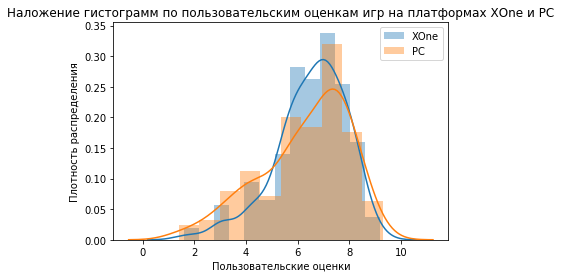

In [40]:
data = data.dropna(subset=['user_score'])

user_score_x1_avg = data.query('platform == "XOne"')['user_score'].mean()
user_score_x1_var_estimate = np.var(data.query('platform == "XOne"')['user_score'], ddof=1)
user_score_x1_std_deviation = np.sqrt(user_score_x1_var_estimate)

user_score_pc_avg = data.query('platform == "PC"')['user_score'].mean()
user_score_pc_var_estimate = np.var(data.query('platform == "PC"')['user_score'], ddof=1)
user_score_pc_std_deviation = np.sqrt(user_score_pc_var_estimate)

print('Средний пользовательский рейтинг по платформе XOne:', round(user_score_x1_avg, 2))
print('Стандартное отклонение пользовательского рейтинга по платформе XOne:', round(user_score_x1_std_deviation, 2))
print('')
print('Средний пользовательский рейтинг по платформе PC:', round(user_score_pc_avg, 2))
print('Стандартное отклонение пользовательского рейтинга по платформе PC:', round(user_score_pc_std_deviation, 2))

# совместная гистограмма
sns.distplot(data.query('platform == "XOne"')['user_score'], label='XOne')
sns.distplot(data.query('platform == "PC"')['user_score'], label='PC')
plt.xlabel('Пользовательские оценки')
plt.ylabel('Плотность распределения')
plt.title('Наложение гистограмм по пользовательским оценкам игр на платформах XOne и PC')
plt.legend();

Проверим нулевую гипотезу - Проведем статистический тест на равенство средних двух генеральных совокупностей по их выборкам (принимаем, что дисперсии примерно одинаковы):

In [41]:
# Определяем критический уровень статистической значимости
alpha = 0.05

results_1 = st.ttest_ind(data.query('platform == "XOne"')['user_score'], data.query('platform == "PC"')['user_score'])
print('p-значение:', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.15503167687396294
Не получилось отвергнуть нулевую гипотезу


Основываясь на статистическом тесте данные из выборок не противоречат нулевой гипотезе - Средние пользовательские рейтинги по платформам XOne и PC равны.

### Проверка второй гипотезы

2-ая гипотеза звучит так - "Средние пользовательские рейтинги жанров Action и Sports разные".
Примем за нулевую гипотезу H₀ - Средние рейтинги по user_score жанров Action и Sports равны.
Примем за алтернативную гипотезу H₁ - Средние рейтинги по user_score жанров Action и Sports не равны.

Посмотрим на средние значения рейтингов игр по этим жанрам, стандартные отклонения и оценим распределения:

Средний пользовательский рейтинг по жанру Action: 6.84
Стандартное отклонение пользовательского рейтинга по жанру Action: 1.33

Средний пользовательский рейтинг по жанру Sports: 5.24
Стандартное отклонение пользовательского рейтинга по жанру Sports: 1.78


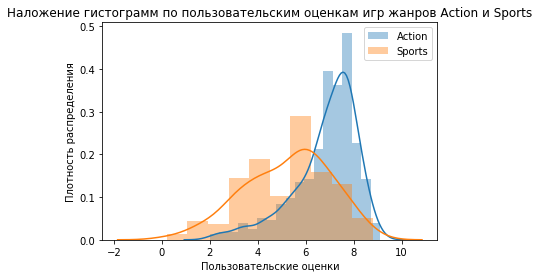

In [42]:
user_score_action_avg = data.query('genre == "Action"')['user_score'].mean()
user_score_action_var_estimate = np.var(data.query('genre == "Action"')['user_score'], ddof=1)
user_score_action_std_deviation = np.sqrt(user_score_action_var_estimate)

user_score_sports_avg = data.query('genre == "Sports"')['user_score'].mean()
user_score_sports_var_estimate = np.var(data.query('genre == "Sports"')['user_score'], ddof=1)
user_score_sports_std_deviation = np.sqrt(user_score_sports_var_estimate)

print('Средний пользовательский рейтинг по жанру Action:', round(user_score_action_avg, 2))
print('Стандартное отклонение пользовательского рейтинга по жанру Action:', round(user_score_action_std_deviation, 2))
print('')
print('Средний пользовательский рейтинг по жанру Sports:', round(user_score_sports_avg, 2))
print('Стандартное отклонение пользовательского рейтинга по жанру Sports:', round(user_score_sports_std_deviation, 2))

# совместная гистограмма
sns.distplot(data.query('genre == "Action"')['user_score'], label='Action')
sns.distplot(data.query('genre == "Sports"')['user_score'], label='Sports')
plt.xlabel('Пользовательские оценки')
plt.ylabel('Плотность распределения')
plt.title('Наложение гистограмм по пользовательским оценкам игр жанров Action и Sports')
plt.legend();

Проверим нулевую гипотезу - Проведем статистический тест на равенство средних двух генеральных совокупностей по их выборкам (принимаем, что дисперсии примерно одинаковы):

In [43]:
results_2 = st.ttest_ind(data.query('genre == "Action"')['user_score'], data.query('genre == "Sports"')['user_score'])
print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.11729623919141e-28
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается в пользу альтернативной на любом разумном уровне значимости, т.е. средние пользовательсике рейтинги жанров Action и Sports не равны.

### Общий вывод по исследованию
<a id="conclusion"></a>
Данные для анализа потребовали предобработки. В результате нее были обработаны пропущенные значения, где это было разумно, заменен тип данных у нескольких столбцов для удобства анализа и общей производительности, обогащен данными столбец возрастного рейтинга от организации ESRB для его понимания.

Было проведено исследование по параметрам, влияющим на успешность (продаваемость) игр, для планирования рекламной кампании на 2017 год.
Выводы по исследованию и рекомендации:
1. Для планирования подходят не все данные, а лишь с 2013 года, когда вышли последние платформы (PS4 и XOne). Игровая индустрия быстро меняется;
2. Лидеры по мировым продажам с 2013 года такие: 1) PS4 2) PS3 3) XOne 4) 3DS 5)X360;
3. Медианные средние значения продаж игр по платформам не превышают 250 тыс. копий по игре. Но медианные значения продаж у платформ Xbox выше всех, а у платформ PlayStation больше игр, которые становятся бестселлерами и продаются многомиллионными тиражами.
4. Никакой корреляции по отзывам пользователей с продажами не наблюдается. А вот по хорошим отзывам критиков можно сказать, что тенденция к повышению продаж есть у всех популярных платформ, но явной корреляции все-таки нет.
5. Самые продаваемые в мире жанры: 1) Action, 2) Shooter, 3) Sports, 4) Role-Playing 5) Misc. Есть и интересные факты - 1) в Японии крайне популярен жанр Role-Playing, его продажи самые большие в мире именно там 2) в жанре Shooter присутствует больший % игр, которые стали бестселлерами 3) в жанре Adventure выпускается много игр, но продажи по нему низкие.
6. По региональному портрету: 1) для Европы на 5-ом месте по популярности присутствует жанр Racing, в остальном как в целом по миру 2) В Европе популярнее платформы от PlayStation, в Америке популярно играть и в PlayStation и в Xbox, в Японии лидер Nintendo 3) Если смотреть на рейтинг ESRB в Сев. Америке и Европе, то большие продажи у категорий Mature 17+, Everyone, Everyone 10+. Лучшие медианные значения продаж по рейтингам Mature 17+ и Everyone 10+.
**Итого**: Рекомендация для рекламной кампании на 2017 год - делать больше ставку на игры от PlayStation (платформы PS4), в меньшей доле на Xbox (Xone), и оставить небольшие доли игр для платформ PS3, 3DS и X360 соответственно. По жанрам делать ставку на 1) Action, 2) Shooter, 3) Sports, 4) Role-Playing 5) Misc./Racing. Посматривать на высокие рейтинги критиков для игр, но сильно на них не ориентироваться. Ориентироваться на игры со следующими рейтингами ESRB: Mature 17+, Everyone, Everyone 10+.

В исследовании также проверялись гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотезы подтвердились на статистических тестах по имеющимся выборкам.